In [1]:
import numpy as np
import mocalum as mc
from mocalum import plot_mocalum_setup, spher2cart
import matplotlib.pyplot as plt
from tqdm import tqdm
import xarray as xr
from numpy.linalg import inv as inv


# General setup

In [4]:
koshava_xyz = [500, 500, 0]
no_scans = 100
# wind field setup
ref_height = 100      # power law reference height
meas_height = 100 
shear_exponent = 0.2  # power law shear exponent
wind_speed = 8       # wind speed at referenec height
wind_dir = 20 # wind direction
w = 0 

# beam steering setup
distance = 1000   # meter
elevation = np.degrees(np.arcsin(meas_height / distance))
angular_res = 1   # degree
azimuth_mid = 45  # central azimuth angle
sector_size = 30  # degree
scan_speed = 1    # degree.s^-1
max_speed = 50    # degree.s^-1
max_acc = 100     # degree.s^-2

# Uncertainty terms
no_sim = 10000 # number of simulations
corr_coef = 0  # correlation coefficient
mu = 0         # we assume no systematic uncertainty
azim_std = 0.1 # degrees
elev_std = 0.1 # degrees
dis_std = 10   # meters
rad_std = 0.1  # m.s-1  In [23]:  

# Power-Law wind field (no turbulence)

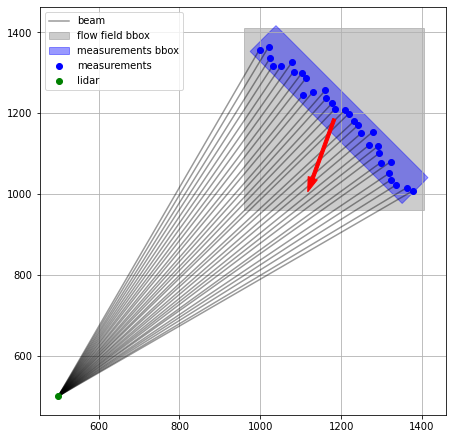

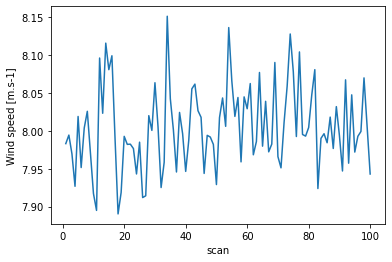

In [5]:
pl_unc_test = mc.Mocalum()
pl_unc_test.set_ivap_probing(koshava_xyz, sector_size, azimuth_mid, angular_res, elevation, distance, 
                    no_scans, scan_speed, max_speed,max_acc)

pl_unc_test.gen_unc_contributors(corr_coef)
pl_unc_test.gen_plaw_ffield(wind_speed, wind_dir, w, ref_height, shear_exponent)
plot_mocalum_setup(pl_unc_test)


pl_unc_test.calc_los_speed()
pl_unc_test.reconstruct_wind()
pl_unc_test.data.rc_wind.ws.plot()

# Power-Law wind field with turbulence

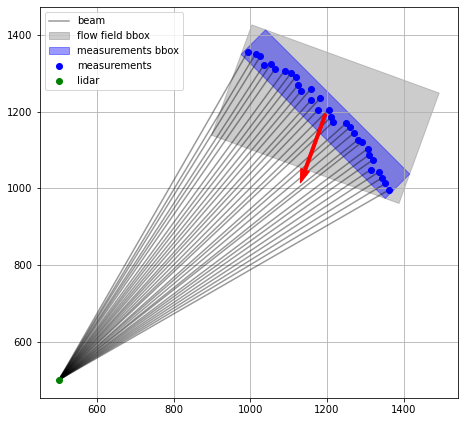

In [13]:

turb_ff_unc_test = mc.Mocalum()
turb_ff_unc_test.set_ivap_probing(koshava_xyz, sector_size, azimuth_mid, angular_res, elevation, distance, 
                    no_scans, scan_speed, max_speed,max_acc)

turb_ff_unc_test.gen_unc_contributors(corr_coef)
turb_ff_unc_test.gen_turb_ffield(wind_speed, wind_dir, w, ref_height, shear_exponent)



plot_mocalum_setup(turb_ff_unc_test)




In [7]:
turb_ff_unc_test.calc_los_speed()

Projecting LOS: 100%|██████████| 3100/3100 [04:25<00:00, 11.70it/s]


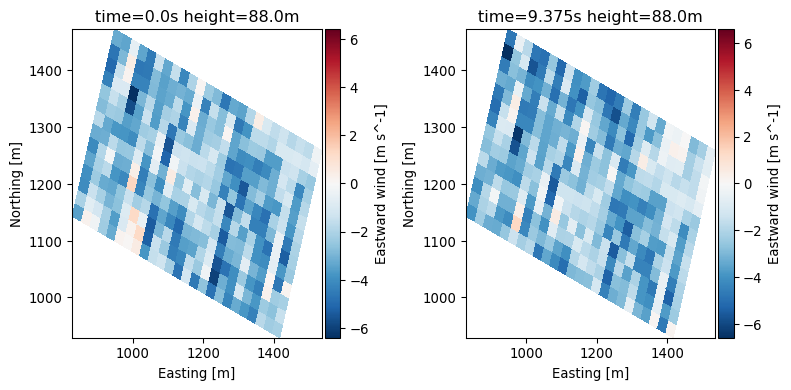

In [11]:
width_px = height_px = 400 # resolution of plots
MY_DPI = 96
fig, axes = plt.subplots(ncols=2, figsize=(2*width_px/MY_DPI, height_px/MY_DPI), dpi=MY_DPI)

i=0

j=k=0
cs = turb_ff_unc_test.data.ffield.u.isel(z=i,time=j).plot.pcolormesh('Easting','Northing',
                                                                     ax=axes[k],add_colorbar=False)
cbar = plt.colorbar(cs,orientation='vertical', fraction=0.07, pad=0.01,ax=axes[k])
axes[k].set_title('time=' + str(turb_ff_unc_test.data.ffield.time[i].values) + 's' 
                  + ' height=' + str(np.round(turb_ff_unc_test.data.ffield.z[j].values)) + 'm')

cbar.set_label('Eastward wind [m s^-1]', fontsize = 10)


j=3
k=1
cs = turb_ff_unc_test.data.ffield.u.isel(z=i,time=j).plot.pcolormesh('Easting','Northing',
                                                                     ax=axes[k],add_colorbar=False)
cbar = plt.colorbar(cs,orientation='vertical', fraction=0.07, pad=0.01,ax=axes[k])
axes[k].set_title('time=' + str(turb_ff_unc_test.data.ffield.time[j].values) + 's' 
                  + ' height=' + str(np.round(turb_ff_unc_test.data.ffield.z[i].values)) + 'm')


cbar.set_label('Eastward wind [m s^-1]', fontsize = 10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.45, hspace=-0.55)
plt.show()
fig.savefig('/Users/niva/Desktop/grid_plot.png', bbox_inches='tight')

In [14]:
turb_ff_unc_test.data._ffield

<xarray.Dataset>
Dimensions:  (time: 193, y: 24, z: 6)
Coordinates:
  * time     (time) float64 0.0 3.125 6.25 9.375 ... 590.6 593.8 596.9 600.0
  * y        (y) float64 -1e+03 -975.4 -950.4 -925.4 ... -475.4 -450.4 -425.4
  * z        (z) float64 88.71 93.71 98.71 103.7 108.7 113.7
Data variables:
    u        (z, y, time) float64 -2.908 -2.353 -2.811 ... -0.7983 -0.9602
    v        (z, y, time) float64 -9.14 -8.235 -7.078 ... -6.967 -6.329 -7.552
    w        (z, y, time) float64 -0.7416 -0.1788 -0.3405 ... 0.5301 -0.1054
Attributes:
    title:      Turbulent flow field dataset
    generator:  PyConTurb

In [15]:
turb_ff_unc_test.data.ffield

<xarray.Dataset>
Dimensions:   (time: 180, x: 14, y: 24, z: 6)
Coordinates:
  * time      (time) float64 0.0 3.125 6.25 9.375 ... 550.0 553.1 556.2 559.4
  * y         (y) float64 -1e+03 -975.4 -950.4 -925.4 ... -475.4 -450.4 -425.4
  * z         (z) float64 88.71 93.71 98.71 103.7 108.7 113.7
  * x         (x) float64 1.377e+03 1.402e+03 1.427e+03 ... 1.677e+03 1.702e+03
    Easting   (x, y) float64 1.411e+03 1.388e+03 1.364e+03 ... 1.005e+03 982.0
    Northing  (x, y) float64 952.1 960.6 969.2 ... 1.437e+03 1.446e+03 1.454e+03
    Height    (z) float64 88.71 93.71 98.71 103.7 108.7 113.7
Data variables:
    u         (time, z, y, x) float64 -2.908 -2.353 -2.811 ... -0.7983 -0.9602
    v         (time, z, y, x) float64 -9.14 -8.235 -7.078 ... -6.329 -7.552
    w         (time, z, y, x) float64 -0.7416 -0.1788 -0.3405 ... 0.5301 -0.1054
Attributes:
    generator:  PyConTurb
    title:      Turbulent flow field dataset